In [18]:
# --- CÓDIGO PARA O INÍCIO DO NOTEBOOK DA PARTE 2 ---

#  Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de Machine Learning do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Bibliotecas importadas com sucesso!")

#  Carregamento dos dados tratados
try:
    df = pd.read_csv("dados_tratados.csv")
    print("\nArquivo 'dados_tratados.csv' carregado com sucesso!")
except FileNotFoundError:
    print("\nErro: Arquivo 'dados_tratados.csv' não encontrado.")
    print("Certifique-se de que salvou o arquivo no final do notebook da Parte 1 e que ele está na mesma pasta.")

#  Verificação inicial dos dados
if 'df' in locals():
    print("\nInformações do DataFrame carregado:")
    df.info()
    
    print("\n\nVisualizando as primeiras 5 linhas:")
    display(df.head())

Bibliotecas importadas com sucesso!

Arquivo 'dados_tratados.csv' carregado com sucesso!

Informações do DataFrame carregado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   evasao                7267 non-null   int64  
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   possui_parceiro       7267 non-null   int64  
 5   possui_dependentes    7267 non-null   int64  
 6   meses_contrato        7267 non-null   int64  
 7   servico_telefone      7267 non-null   int64  
 8   multiplas_linhas      7267 non-null   int64  
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   int64  
 1

,id_cliente,evasao,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,faturamento_mensal,faturamento_total,faturamento_diario
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [19]:
# Lista de colunas que não serão úteis para o modelo preditivo
colunas_para_remover = ['id_cliente', 'faturamento_diario']


df_modelagem = df.drop(columns=colunas_para_remover)


print("Colunas 'id_cliente' e 'faturamento_diario' removidas com sucesso!")
print("\nDataFrame pronto para a próxima etapa:")
df_modelagem.head()

Colunas 'id_cliente' e 'faturamento_diario' removidas com sucesso!

DataFrame pronto para a próxima etapa:


,evasao,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,faturamento_mensal,faturamento_total
0,0,feminino,0,1,1,9,1,0,DSL,no,yes,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0,masculino,0,0,0,9,1,1,DSL,no,no,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1,masculino,0,0,0,4,1,0,Fiber optic,no,no,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1,masculino,1,1,0,13,1,0,Fiber optic,no,yes,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1,feminino,1,1,0,3,1,0,Fiber optic,no,no,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [20]:

df_encoded = df_modelagem.copy()


colunas_categoricas = ['genero', 'servico_internet', 'tipo_contrato', 'metodo_pagamento']


df_encoded = pd.get_dummies(df_encoded, columns=colunas_categoricas, drop_first=True)

print("Variáveis categóricas transformadas em formato numérico!")
print("\nNovas colunas criadas:")
df_encoded.info()

print("\n\nVisualizando o resultado:")
display(df_encoded.head())

Variáveis categóricas transformadas em formato numérico!

Novas colunas criadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   evasao                                    7267 non-null   int64  
 1   idoso                                     7267 non-null   int64  
 2   possui_parceiro                           7267 non-null   int64  
 3   possui_dependentes                        7267 non-null   int64  
 4   meses_contrato                            7267 non-null   int64  
 5   servico_telefone                          7267 non-null   int64  
 6   multiplas_linhas                          7267 non-null   int64  
 7   seguranca_online                          7267 non-null   object 
 8   backup_online                             7267 non-null   object 
 9   protecao_dispositivo      

,evasao,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,...,faturamento_mensal,faturamento_total,genero_masculino,servico_internet_Fiber optic,servico_internet_No,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,0,1,1,9,1,0,no,yes,0,...,65.6,593.30,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,no,no,0,...,59.9,542.40,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,no,no,1,...,73.9,280.85,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,no,yes,1,...,98.0,1237.85,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,no,no,0,...,83.9,267.40,False,True,False,False,False,False,False,True


In [21]:
# Identifica as colunas que ainda são do tipo 'object' (texto) e precisam de conversão
colunas_para_converter = ['seguranca_online', 'backup_online']
mapa_binario = {'yes': 1, 'no': 0, 'no internet service': 0}

# Aplica a conversão para 0 e 1 nessas colunas
for coluna in colunas_para_converter:
    df_encoded[coluna] = df_encoded[coluna].map(mapa_binario)

# Preenche possíveis valores nulos que possam ter surgido no processo com 0
df_encoded.fillna(0, inplace=True)

# Garante que as colunas sejam do tipo inteiro
for coluna in colunas_para_converter:
    df_encoded[coluna] = df_encoded[coluna].astype(int)

print("Colunas corrigidas com sucesso! Todas as variáveis agora são numéricas.")
df_encoded.info()

Colunas corrigidas com sucesso! Todas as variáveis agora são numéricas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   evasao                                    7267 non-null   int64  
 1   idoso                                     7267 non-null   int64  
 2   possui_parceiro                           7267 non-null   int64  
 3   possui_dependentes                        7267 non-null   int64  
 4   meses_contrato                            7267 non-null   int64  
 5   servico_telefone                          7267 non-null   int64  
 6   multiplas_linhas                          7267 non-null   int64  
 7   seguranca_online                          7267 non-null   int64  
 8   backup_online                             7267 non-null   int64  
 9   protecao_dispositivo               

In [22]:
# Contagem de valores absolutos na coluna 'evasao'
# 0 = Permaneceu Ativo | 1 = Evadiu (Churn)
contagem_evasao = df_encoded['evasao'].value_counts()
print("Contagem de clientes por classe:")
print(contagem_evasao)

print("\n" + "="*40 + "\n")

# Proporção (porcentagem) de cada classe
# normalize=True retorna as frequências relativas
proporcao_evasao = df_encoded['evasao'].value_counts(normalize=True) * 100
print("Proporção de clientes por classe (%):")
print(proporcao_evasao)

Contagem de clientes por classe:
evasao
0    5398
1    1869
Name: count, dtype: int64


Proporção de clientes por classe (%):
evasao
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [23]:
# Separar as variáveis preditoras (X) e a variável-alvo (y)
X = df_encoded.drop(columns='evasao')
y = df_encoded['evasao']

# Dividir os dados em conjuntos de treino e teste
# test_size=0.2 significa que 20% dos dados serão para teste e 80% para treino
# random_state=42 garante que a divisão seja sempre a mesma, para reprodutibilidade
# stratify=y garante que a proporção de evasão/não evasão seja a mesma nos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

#  Exibir o tamanho dos conjuntos de dados resultantes
print("Dados divididos com sucesso!")
print(f"Formato de X_train (dados de treino): {X_train.shape}")
print(f"Formato de X_test (dados de teste): {X_test.shape}")
print(f"Formato de y_train (alvo de treino): {y_train.shape}")
print(f"Formato de y_test (alvo de teste): {y_test.shape}")

# Verificando a proporção da variável-alvo no conjunto de treino
print("\nProporção de evasão no conjunto de treino (%):")
print(y_train.value_counts(normalize=True) * 100)

Dados divididos com sucesso!
Formato de X_train (dados de treino): (5813, 23)
Formato de X_test (dados de teste): (1454, 23)
Formato de y_train (alvo de treino): (5813,)
Formato de y_test (alvo de teste): (1454,)

Proporção de evasão no conjunto de treino (%):
evasao
0    74.281782
1    25.718218
Name: proportion, dtype: float64


In [24]:
# Identificar as colunas numéricas que precisam de padronização
colunas_numericas = ['meses_contrato', 'faturamento_mensal', 'faturamento_total']

# Inicializar o StandardScaler
scaler = StandardScaler()

#  Ajustar e transformar os DADOS DE TREINO

X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])


X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])


print("Colunas numéricas padronizadas com sucesso!")
display(X_train.head())

Colunas numéricas padronizadas com sucesso!


,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,...,faturamento_mensal,faturamento_total,genero_masculino,servico_internet_Fiber optic,servico_internet_No,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
562,0,1,1,0.426372,1,1,0,0,0,0,...,-1.338621,-0.571317,False,False,True,True,False,False,False,False
1432,0,1,0,-0.468878,1,1,0,0,0,0,...,0.721149,-0.211001,False,True,False,False,False,False,True,False
641,0,1,1,0.914690,1,1,0,0,0,0,...,0.687954,1.072314,True,True,False,False,False,False,False,False
1543,0,1,1,0.507758,1,0,0,0,0,0,...,-1.486341,-0.618479,False,False,True,False,True,False,False,False
3010,0,1,1,1.240236,1,1,0,1,0,0,...,0.882146,1.536785,True,True,False,True,False,False,True,False


Correlação das variáveis com 'evasao':
evasao                                      1.000000
servico_internet_Fiber optic                0.300949
metodo_pagamento_Electronic check           0.294626
faturamento_mensal                          0.189866
fatura_digital                              0.186666
idoso                                       0.146733
streaming_tv                                0.062430
streaming_filmes                            0.060586
multiplas_linhas                            0.039343
servico_telefone                            0.012571
genero_masculino                           -0.009555
protecao_dispositivo                       -0.063452
backup_online                              -0.080163
metodo_pagamento_Mailed check              -0.090061
metodo_pagamento_Credit card (automatic)   -0.131085
possui_parceiro                            -0.148546
suporte_tecnico                            -0.160440
possui_dependentes                         -0.161384
seguran

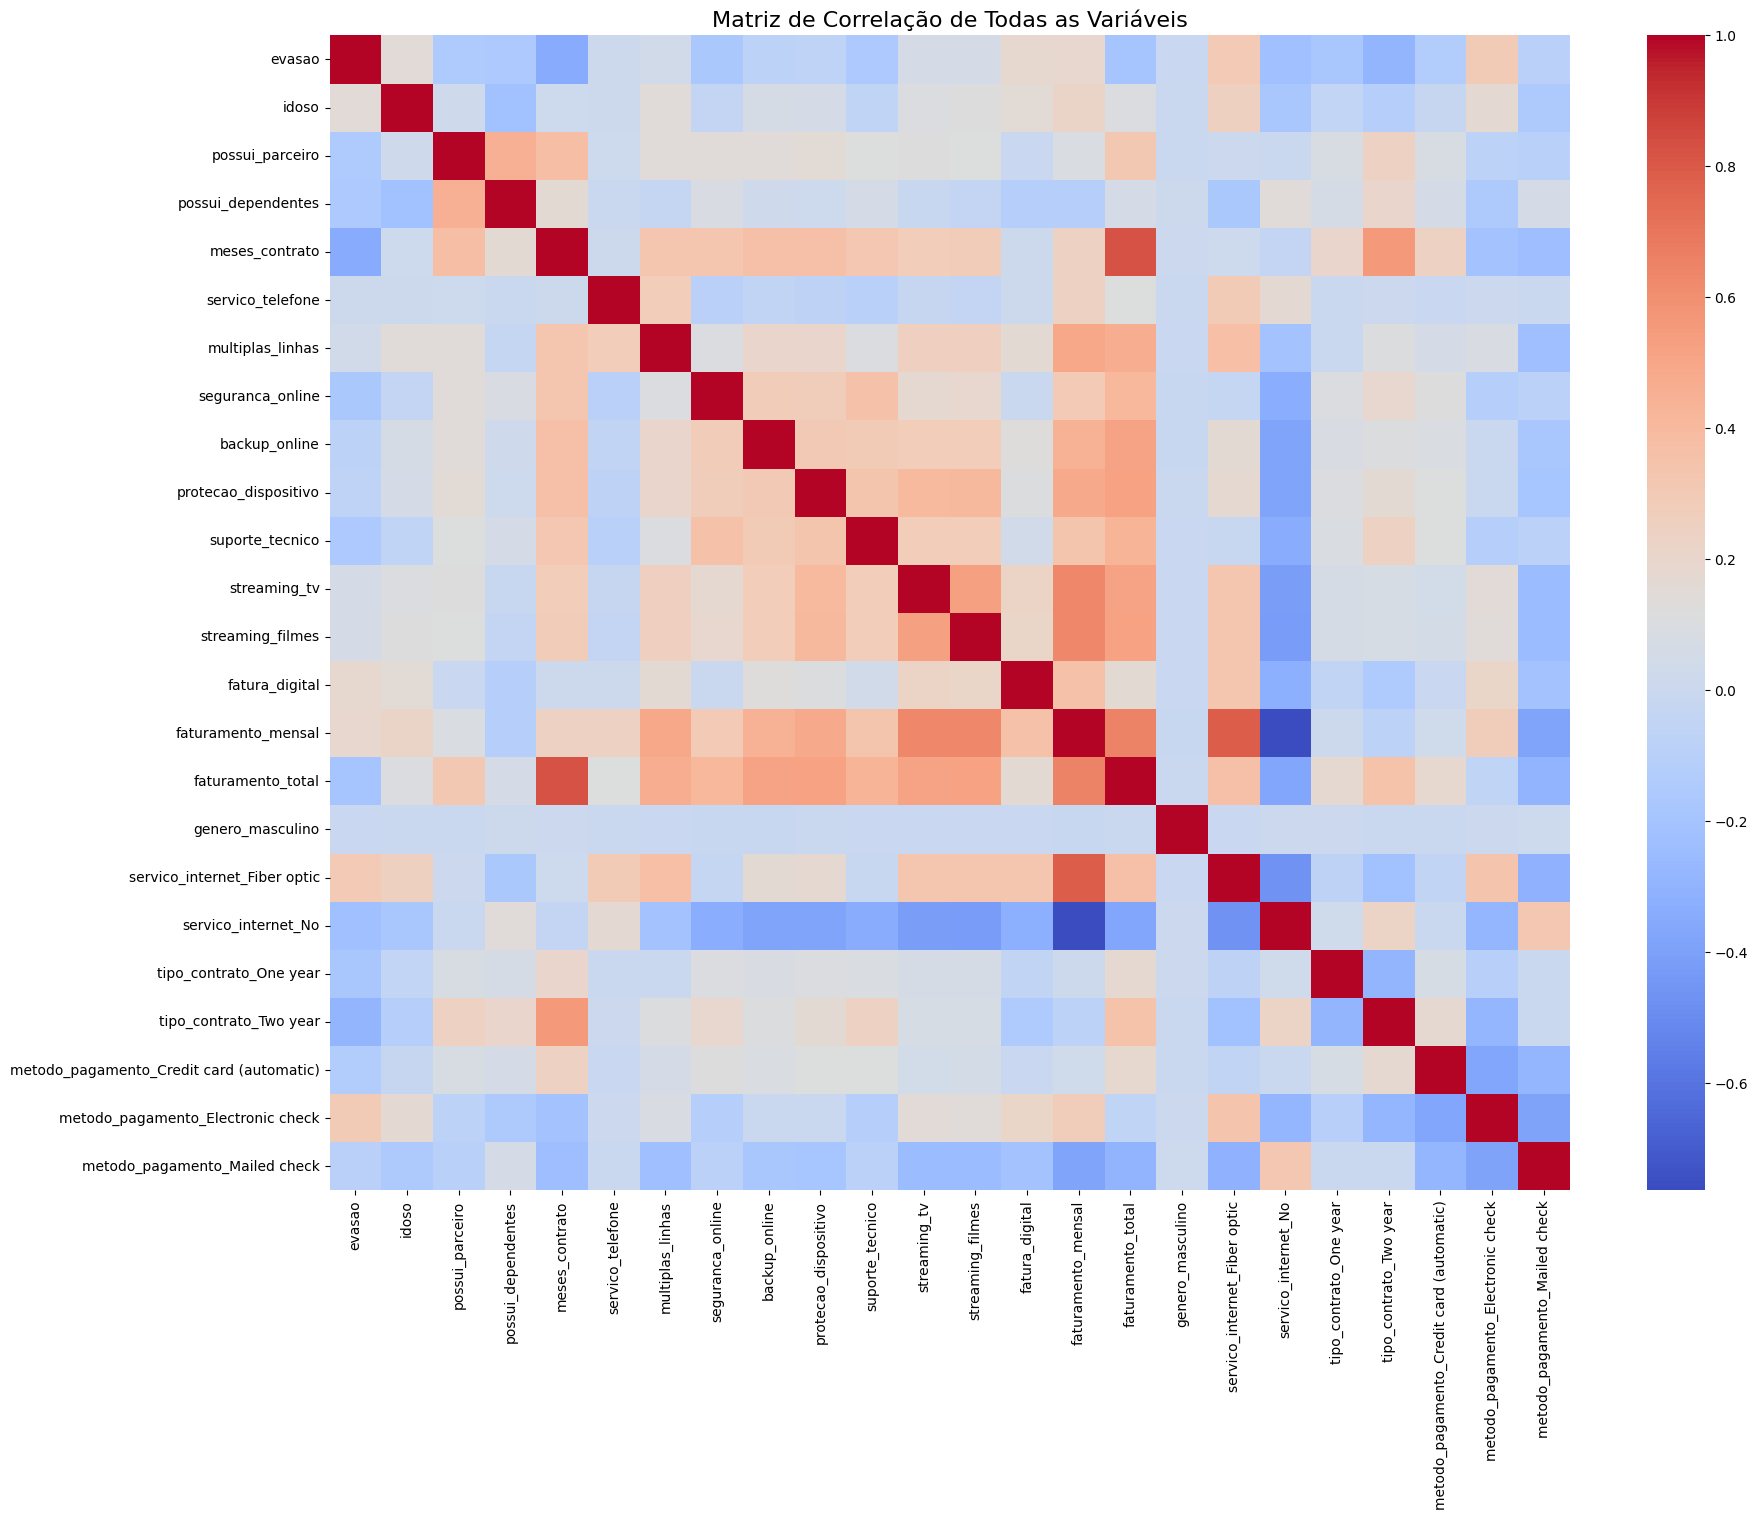

In [25]:
# Calcula a matriz de correlação completa
corr_matrix = df_encoded.corr()

# Isola e ordena as correlações com a variável-alvo 'evasao'
corr_evasao = corr_matrix['evasao'].sort_values(ascending=False)

print("Correlação das variáveis com 'evasao':")
print(corr_evasao)

# Define o tamanho da figura para melhor visualização
plt.figure(figsize=(20, 15))

# Cria o heatmap da matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=False para não poluir com muitas variáveis

# Adiciona um título ao gráfico
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=16)

# Salva a imagem do heatmap
plt.savefig('matriz_correlacao.png')

print("\nImagem 'matriz_correlacao.png' salva com sucesso.")


C:\Users\Matheus\AppData\Local\Temp\ipykernel_5720\1176399230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasao', y='meses_contrato', data=df_plot, palette='pastel')


Gráfico 'boxplot_evasao_por_meses.png' salvo com sucesso.


C:\Users\Matheus\AppData\Local\Temp\ipykernel_5720\1176399230.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasao', y='faturamento_total', data=df_plot, palette='pastel')


Gráfico 'boxplot_evasao_por_faturamento_total.png' salvo com sucesso.


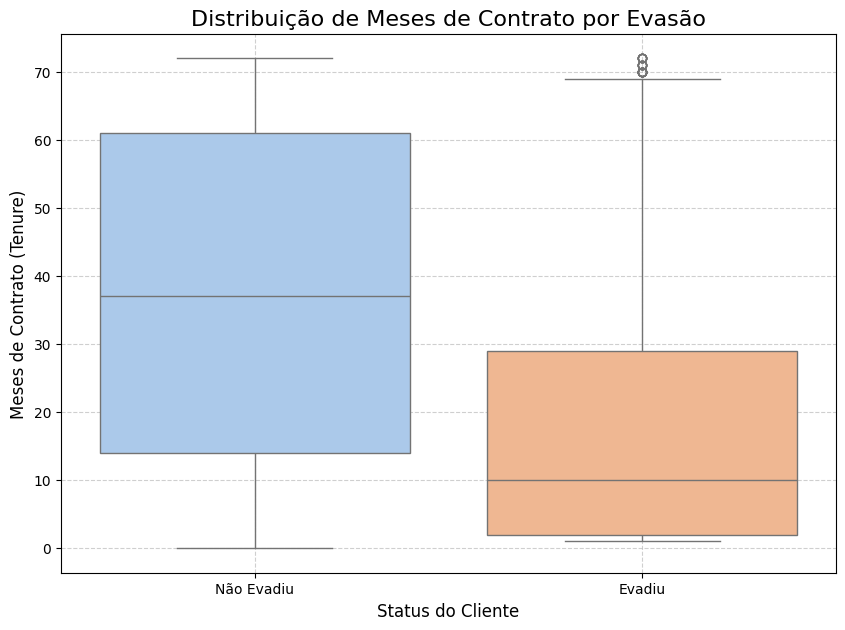

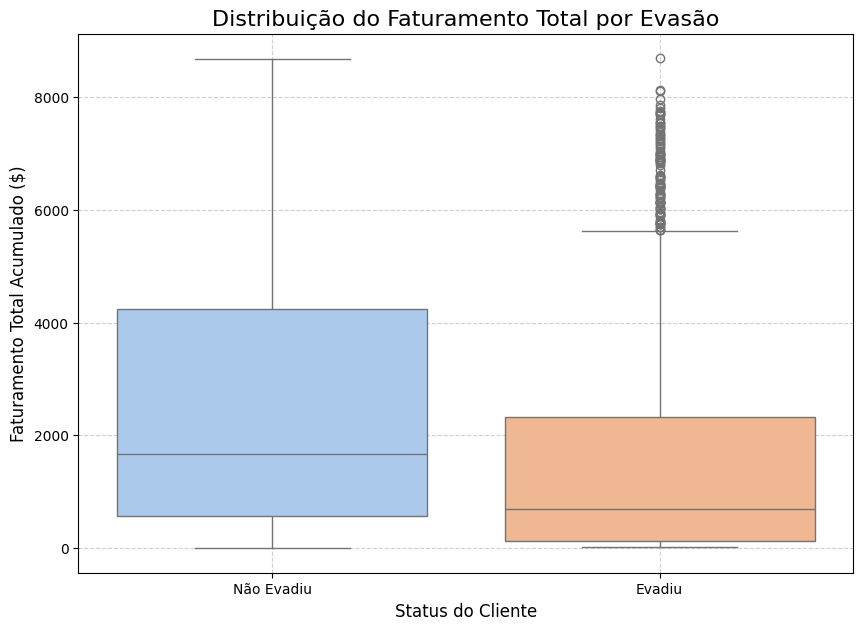

In [26]:

df_plot = df_encoded.copy()
df_plot['evasao'] = df_plot['evasao'].map({0: 'Não Evadiu', 1: 'Evadiu'})

# --- Gráfico 1: Evasão por Meses de Contrato ---


plt.figure(figsize=(10, 7))

# Cria o boxplot
sns.boxplot(x='evasao', y='meses_contrato', data=df_plot, palette='pastel')


plt.title('Distribuição de Meses de Contrato por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Meses de Contrato (Tenure)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


plt.savefig('boxplot_evasao_por_meses.png')
print("Gráfico 'boxplot_evasao_por_meses.png' salvo com sucesso.")


# --- Gráfico 2: Evasão por Faturamento Total ---


plt.figure(figsize=(10, 7))


sns.boxplot(x='evasao', y='faturamento_total', data=df_plot, palette='pastel')


plt.title('Distribuição do Faturamento Total por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Faturamento Total Acumulado ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


plt.savefig('boxplot_evasao_por_faturamento_total.png')
print("Gráfico 'boxplot_evasao_por_faturamento_total.png' salvo com sucesso.")

In [27]:
# --- 1. Treinamento do Modelo de Regressão Logística ---

# Inicializa o modelo
modelo_rl = LogisticRegression(random_state=42)

# Treina o modelo com os dados de treino
modelo_rl.fit(X_train, y_train)

# Faz as previsões nos dados de teste
previsoes_rl = modelo_rl.predict(X_test)


# --- 2. Treinamento do Modelo Random Forest ---

# Inicializa o modelo
modelo_rf = RandomForestClassifier(random_state=42)

# Treina o modelo com os dados de treino
modelo_rf.fit(X_train, y_train)

# Faz as previsões nos dados de teste
previsoes_rf = modelo_rf.predict(X_test)


# --- 3. Avaliação e Comparação dos Modelos ---

print("="*50)
print("Avaliação do Modelo de Regressão Logística")
print("="*50)
print(f"Acurácia: {accuracy_score(y_test, previsoes_rl):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_rl))


print("\n" + "="*50)
print("Avaliação do Modelo Random Forest")
print("="*50)
print(f"Acurácia: {accuracy_score(y_test, previsoes_rf):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_rf))

Avaliação do Modelo de Regressão Logística
Acurácia: 0.80

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


Avaliação do Modelo Random Forest
Acurácia: 0.78

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.70      1454
weighted avg       0.77      0.78      0.77      1454



Avaliação do Modelo de Regressão Logística
Acurácia (Treino): 0.81
Acurácia (Teste): 0.80

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

  Não Evadiu       0.85      0.89      0.87      1080
      Evadiu       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


Avaliação do Modelo Random Forest
Acurácia (Treino): 0.99
Acurácia (Teste): 0.78

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

  Não Evadiu       0.83      0.89      0.86      1080
      Evadiu       0.60      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.70      1454
weighted avg       0.77      0.78      0.77      1454


Imagem 'matriz_confusao_rl.png' salva com sucesso.
Imagem 'matriz_confusao_rf.png' salva com sucess

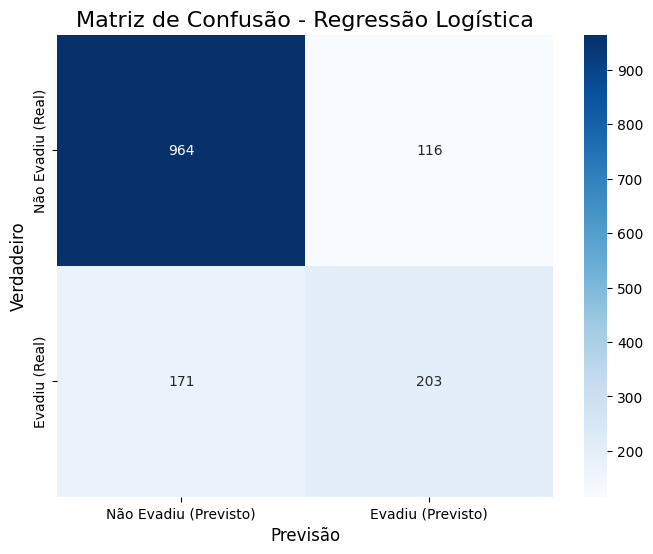

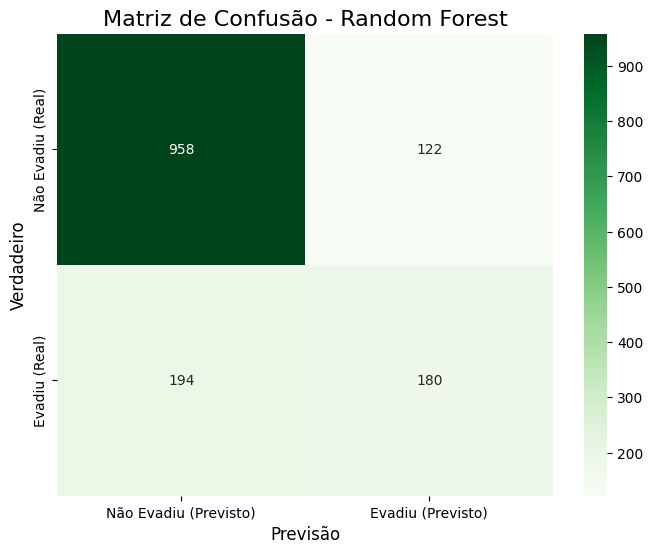

In [28]:
# --- AVALIAÇÃO DETALHADA DOS MODELOS ---


previsoes_treino_rl = modelo_rl.predict(X_train)
previsoes_treino_rf = modelo_rf.predict(X_train)

# --- 1. Relatórios de Desempenho ---

print("="*50)
print("Avaliação do Modelo de Regressão Logística")
print("="*50)
print(f"Acurácia (Treino): {accuracy_score(y_train, previsoes_treino_rl):.2f}")
print(f"Acurácia (Teste): {accuracy_score(y_test, previsoes_rl):.2f}")
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, previsoes_rl, target_names=['Não Evadiu', 'Evadiu']))

print("\n" + "="*50)
print("Avaliação do Modelo Random Forest")
print("="*50)
print(f"Acurácia (Treino): {accuracy_score(y_train, previsoes_treino_rf):.2f}")
print(f"Acurácia (Teste): {accuracy_score(y_test, previsoes_rf):.2f}")
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, previsoes_rf, target_names=['Não Evadiu', 'Evadiu']))


# --- 2. Matrizes de Confusão ---

# Matriz de Confusão para Regressão Logística
cm_rl = confusion_matrix(y_test, previsoes_rl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rl, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Evadiu (Previsto)', 'Evadiu (Previsto)'], 
            yticklabels=['Não Evadiu (Real)', 'Evadiu (Real)'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.savefig('matriz_confusao_rl.png')
print("\nImagem 'matriz_confusao_rl.png' salva com sucesso.")

# Matriz de Confusão para Random Forest
cm_rf = confusion_matrix(y_test, previsoes_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Evadiu (Previsto)', 'Evadiu (Previsto)'], 
            yticklabels=['Não Evadiu (Real)', 'Evadiu (Real)'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.savefig('matriz_confusao_rf.png')
print("Imagem 'matriz_confusao_rf.png' salva com sucesso.")